In [1]:
import os
import numpy as np
from tifffile import imread
import matplotlib.pyplot as plt

In [2]:
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures'
    '/uneven_illumination')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

im = imread('/Volumes/My Book/cylinter_input/CODEX/tif/sample_1.ome.tif', key=3)
im = im[(im != 0).any(1)][:, (im != 0).any(0)]

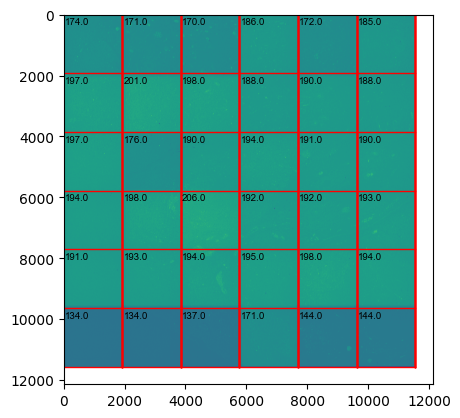

Standard deviation = 19.93 arbitrary fluorescence units


In [3]:
# plot median signal per tile
fig, ax = plt.subplots()
plt.rcParams['font.family'] = "Arial"

ax.imshow(im)

raster_height = round(im.shape[0] / 7)
raster_width = round(im.shape[1] / 7)

# create raster grid to superimpose on images
num_height_samples = round(im.shape[0] / raster_height)
num_width_samples = round(im.shape[1] / raster_width)

row_rnge = np.linspace(0, im.shape[0], num_height_samples).astype(int)
col_rnge = np.linspace(0, im.shape[1], num_width_samples).astype(int)

# initialize 2D array to store per-raster cell counts
cell_counts_img = np.zeros(shape=(im.shape[0], im.shape[1]))

tile_vals = []
# partition single-cell data into rasters and measure
row_start = 0
for e, row_end in enumerate(row_rnge[1:]):
    ax.plot([0, im.shape[1]], [row_end, row_end], c='r', lw=1.0)
    
    col_start = 0
    for j, col_end in enumerate(col_rnge[1:]):
        ax.plot([col_end, col_end], [0, im.shape[0]], c='r', lw=1.0)

        # slice out raster from image
        raster = im[row_start:row_end, col_start:col_end]
        median_signal = np.median(raster)  # compute median a.f.u per tile
        tile_vals.append(median_signal)
        
        # print(e, j, median_signal)
        
        ax.annotate(
            median_signal, size=7, xy=(col_start, row_start), xytext=(1.0, -2.0),
            textcoords='offset points', ha='left', va='top',
            weight='normal', alpha=1.0, color='k', bbox=dict(
                boxstyle='round,pad=0.1', fc='yellow', alpha=0.0)
        )
        col_start = col_end
    row_start = row_end


sd = round(np.std(tile_vals, ddof=1), 2)
print(f'Standard deviation = {sd} arbitrary fluorescence units')
plt.savefig(os.path.join(save_dir, 'uneven_illumination.pdf'))
plt.show()
plt.close('all')